In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

print("Libraries imported successfully")

Libraries imported successfully


In [2]:
# Set parameters
np.random.seed(42)
n_rows = 18000
n_accounts = 900

print("Generating synthetic dataset...")

# Generate base data
data = {
    'touchpoint_id': range(10001, 10001 + n_rows),
    'account_id': np.random.randint(1001, 1001 + n_accounts, n_rows),
    'company_name': [f"Company_{i}" for i in np.random.randint(1, 500, n_rows)],
}

# Industry
industries = ['Technology', 'Finance', 'Healthcare', 'Manufacturing', 'Retail', 'Education', 'Consulting', 'Media']
data['industry'] = np.random.choice(industries, n_rows)

# Company size
sizes = ['Enterprise', 'Mid-Market', 'SMB']
data['company_size'] = np.random.choice(sizes, n_rows)

# Dates
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)
date_range = (end_date - start_date).days
data['touchpoint_date'] = [start_date + timedelta(days=random.randint(0, date_range)) for _ in range(n_rows)]

# Marketing channel
channels = ['Paid Search', 'Organic Social', 'Email', 'Webinar', 'Content Marketing', 'Display Ads', 'Retargeting', 'Direct']
data['marketing_channel'] = np.random.choice(channels, n_rows)

# Campaign details
campaigns = ['Q1_Enterprise_2024', 'Q2_Growth_Campaign', 'Summer_Webinar_Series', 'Fall_Content_Push', 
             'Holiday_Retargeting', 'Brand_Awareness_2024', 'Lead_Gen_Initiative', 'Product_Launch_Q3']
data['campaign_name'] = np.random.choice(campaigns, n_rows)

campaign_types = ['Awareness', 'Consideration', 'Conversion', 'Retention']
data['campaign_type'] = np.random.choice(campaign_types, n_rows)

# Numeric metrics
data['ad_spend'] = np.random.uniform(50, 12000, n_rows).round(2)
data['impressions'] = np.random.randint(100, 500000, n_rows)
data['clicks'] = np.random.randint(10, 15000, n_rows)
data['click_through_rate'] = np.random.uniform(0.5, 25, n_rows).round(2)
data['cost_per_click'] = np.random.uniform(0.5, 500, n_rows).round(2)
data['landing_page_visits'] = np.random.randint(5, 8000, n_rows)
data['form_submissions'] = np.random.randint(0, 2000, n_rows)
data['demo_requests'] = np.random.randint(0, 500, n_rows)
data['mql_generated'] = np.random.randint(0, 300, n_rows)
data['sql_generated'] = np.random.randint(0, 150, n_rows)
data['opportunities_created'] = np.random.randint(0, 80, n_rows)

# Conversion (12% rate)
data['deal_closed'] = np.random.choice([0, 1], n_rows, p=[0.88, 0.12])

# Deal value (only when closed)
data['deal_value'] = [
    np.random.uniform(5000, 150000) if closed == 1 else 0 
    for closed in data['deal_closed']
]

# Other metrics
data['sales_cycle_days'] = np.random.randint(10, 400, n_rows)

positions = ['First Touch', 'Mid Touch', 'Last Touch', 'Multi Touch']
data['touchpoint_position'] = np.random.choice(positions, n_rows)

devices = ['Desktop', 'Mobile', 'Tablet']
data['device_type'] = np.random.choice(devices, n_rows)

regions = ['North America', 'EMEA', 'APAC', 'LATAM']
data['geographic_region'] = np.random.choice(regions, n_rows)

sources = ['Inbound', 'Outbound', 'Partner', 'Referral']
data['lead_source'] = np.random.choice(sources, n_rows)

data['engagement_score'] = np.random.randint(10, 150, n_rows)
data['email_opens'] = np.random.randint(0, 50, n_rows)
data['email_clicks'] = np.random.randint(0, 25, n_rows)

attendance = ['Yes', 'No', 'Registered']
data['webinar_attendance'] = np.random.choice(attendance, n_rows)

data['content_downloads'] = np.random.randint(0, 20, n_rows)

# Create DataFrame
df_raw = pd.DataFrame(data)

print(f"✓ Synthetic dataset generated: {df_raw.shape[0]} rows, {df_raw.shape[1]} columns")
print("\nFirst 5 rows:")
df_raw.head()

Generating synthetic dataset...
✓ Synthetic dataset generated: 18000 rows, 32 columns

First 5 rows:


,touchpoint_id,account_id,company_name,industry,company_size,touchpoint_date,marketing_channel,campaign_name,campaign_type,ad_spend,...,sales_cycle_days,touchpoint_position,device_type,geographic_region,lead_source,engagement_score,email_opens,email_clicks,webinar_attendance,content_downloads
0,10001,1103,Company_107,Retail,Enterprise,2024-04-01,Display Ads,Q2_Growth_Campaign,Awareness,8491.73,...,303,First Touch,Mobile,LATAM,Partner,88,40,6,Yes,15
1,10002,1436,Company_36,Finance,Enterprise,2024-07-29,Organic Social,Brand_Awareness_2024,Conversion,1027.08,...,147,Last Touch,Desktop,EMEA,Outbound,65,30,7,Registered,14
2,10003,1861,Company_147,Manufacturing,SMB,2024-01-15,Paid Search,Holiday_Retargeting,Awareness,4213.33,...,147,Last Touch,Mobile,North America,Inbound,83,33,4,No,4
3,10004,1271,Company_262,Media,Mid-Market,2024-02-04,Direct,Lead_Gen_Initiative,Conversion,11609.75,...,25,Multi Touch,Desktop,North America,Inbound,115,36,11,Registered,5
4,10005,1107,Company_409,Manufacturing,SMB,2024-09-06,Display Ads,Q1_Enterprise_2024,Retention,2353.42,...,116,Last Touch,Tablet,North America,Inbound,103,1,12,Yes,0


In [3]:
print("Introducing realistic data quality issues...")

# 1. Add nulls (various percentages)
null_configs = {
    'industry': 0.08,
    'company_size': 0.06,
    'marketing_channel': 0.03,
    'campaign_name': 0.07,
    'campaign_type': 0.04,
    'ad_spend': 0.10,
    'impressions': 0.05,
    'clicks': 0.06,
    'engagement_score': 0.11,
    'sales_cycle_days': 0.12
}

for col, pct in null_configs.items():
    null_idx = df_raw.sample(frac=pct).index
    df_raw.loc[null_idx, col] = np.nan

print("✓ Missing values introduced")

# 2. Create negative outliers
negative_spend = df_raw.sample(frac=0.05).index
df_raw.loc[negative_spend, 'ad_spend'] = df_raw.loc[negative_spend, 'ad_spend'] * -1

negative_clicks = df_raw.sample(frac=0.03).index
df_raw.loc[negative_clicks, 'clicks'] = df_raw.loc[negative_clicks, 'clicks'] * -1

print("✓ Negative outliers created")

# 3. Create extreme outliers
extreme_ctr = df_raw.sample(frac=0.02).index
df_raw.loc[extreme_ctr, 'click_through_rate'] = np.random.uniform(100, 250, len(extreme_ctr))

print("✓ Extreme outliers added")

# 4. Logic errors - deal value when not closed
logic_error = df_raw[df_raw['deal_closed'] == 0].sample(frac=0.03).index
df_raw.loc[logic_error, 'deal_value'] = np.random.uniform(1000, 50000, len(logic_error))

print("✓ Logic errors introduced")

# 5. Case inconsistencies
case_cols = ['marketing_channel', 'device_type', 'touchpoint_position', 'industry', 'company_size', 'campaign_type']

for col in case_cols:
    # Uppercase 20%
    upper_mask = df_raw[col].notna()
    upper_idx = df_raw[upper_mask].sample(frac=0.2).index
    df_raw.loc[upper_idx, col] = df_raw.loc[upper_idx, col].str.upper()
    
    # Lowercase 20%
    lower_mask = df_raw[col].notna()
    lower_idx = df_raw[lower_mask].sample(frac=0.2).index
    df_raw.loc[lower_idx, col] = df_raw.loc[lower_idx, col].str.lower()

print("✓ Case inconsistencies created")

# 6. Add duplicates
duplicate_rows = df_raw.sample(n=800)
df_raw = pd.concat([df_raw, duplicate_rows], ignore_index=True)

print("✓ Duplicate records added")

print(f"\n✓ Final raw dataset with realistic issues: {df_raw.shape[0]} rows, {df_raw.shape[1]} columns")

Introducing realistic data quality issues...
✓ Missing values introduced
✓ Negative outliers created
✓ Extreme outliers added
✓ Logic errors introduced
✓ Case inconsistencies created
✓ Duplicate records added

✓ Final raw dataset with realistic issues: 18800 rows, 32 columns


In [4]:
# Save raw dataset to CSV
output_path = '../raw_data/marketing_touchpoints_raw.csv'
df_raw.to_csv(output_path, index=False)

print(f"✓ Raw dataset saved successfully!")
print(f"✓ Location: {output_path}")
print(f"✓ File contains {df_raw.shape[0]} rows and {df_raw.shape[1]} columns")
print("\n✓✓✓ DATA ACQUISITION COMPLETE ✓✓✓")

✓ Raw dataset saved successfully!
✓ Location: ../raw_data/marketing_touchpoints_raw.csv
✓ File contains 18800 rows and 32 columns

✓✓✓ DATA ACQUISITION COMPLETE ✓✓✓


In [13]:
# ===== DATA PROFILING =====
print("="*70)
print("STEP 1: LOADING DATASET")
print("="*70)

df_raw = pd.read_csv('../raw_data/marketing_touchpoints_raw.csv')

print(f"\n✓ Dataset loaded: {df_raw.shape[0]} rows × {df_raw.shape[1]} columns")
print("\n" + "="*70)
print("DATASET INFO")
print("="*70)
print(df_raw.info())

STEP 1: LOADING DATASET

✓ Dataset loaded: 18800 rows × 32 columns

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   touchpoint_id          18800 non-null  int64  
 1   account_id             18800 non-null  int64  
 2   company_name           18800 non-null  object 
 3   industry               17298 non-null  object 
 4   company_size           17675 non-null  object 
 5   touchpoint_date        18800 non-null  object 
 6   marketing_channel      18239 non-null  object 
 7   campaign_name          17479 non-null  object 
 8   campaign_type          18045 non-null  object 
 9   ad_spend               16926 non-null  float64
 10  impressions            17851 non-null  float64
 11  clicks                 17679 non-null  float64
 12  click_through_rate     18800 non-null  float64
 13  cost_per_click         18

STEP 2: MISSING VALUES ANALYSIS

Columns with missing values:
           Column  Missing_Count  Missing_Percentage
 sales_cycle_days           2272           12.085106
 engagement_score           2060           10.957447
         ad_spend           1874            9.968085
         industry           1502            7.989362
    campaign_name           1321            7.026596
     company_size           1125            5.984043
           clicks           1121            5.962766
      impressions            949            5.047872
    campaign_type            755            4.015957
marketing_channel            561            2.984043


Matplotlib is building the font cache; this may take a moment.


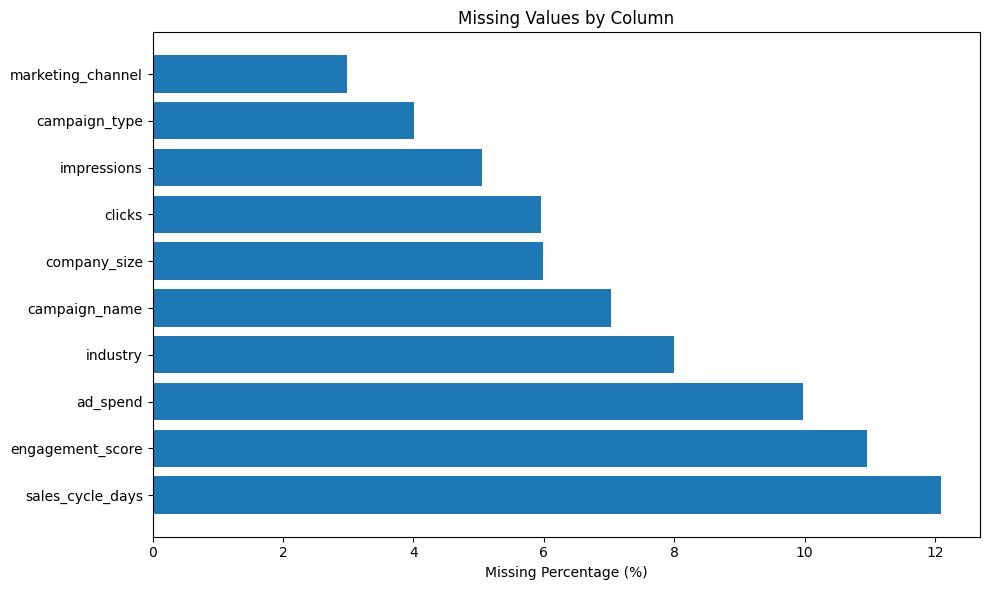


✓ Found missing values in 10 columns


In [14]:
print("="*70)
print("STEP 2: MISSING VALUES ANALYSIS")
print("="*70)

# Calculate missing values
missing = df_raw.isnull().sum()
missing_pct = (df_raw.isnull().sum() / len(df_raw)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})

# Show only columns with missing values
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\nColumns with missing values:")
print(missing_df.to_string(index=False))

# Visualize missing values
import matplotlib.pyplot as plt

if len(missing_df) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(missing_df['Column'], missing_df['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
    
print(f"\n✓ Found missing values in {len(missing_df)} columns")

In [15]:
print("="*70)
print("STEP 3: DUPLICATE RECORDS CHECK")
print("="*70)

# Check exact duplicates
total_duplicates = df_raw.duplicated().sum()
print(f"\nTotal duplicate rows (exact matches): {total_duplicates}")
print(f"Percentage of dataset: {(total_duplicates/len(df_raw)*100):.2f}%")

# Check for key-based duplicates (account + date + channel)
key_duplicates = df_raw.duplicated(subset=['account_id', 'touchpoint_date', 'marketing_channel']).sum()
print(f"\nDuplicates based on account-date-channel combination: {key_duplicates}")

print(f"\n✓ Duplicate analysis complete")

STEP 3: DUPLICATE RECORDS CHECK

Total duplicate rows (exact matches): 800
Percentage of dataset: 4.26%

Duplicates based on account-date-channel combination: 831

✓ Duplicate analysis complete


STEP 4: OUTLIER DETECTION

Negative Values Detected:
  ad_spend: 834 negative values
  clicks: 533 negative values

Extreme Outliers (beyond 1.5 × IQR):
  ad_spend: 350 outliers (1.86%)
  clicks: 247 outliers (1.31%)
  click_through_rate: 375 outliers (1.99%)


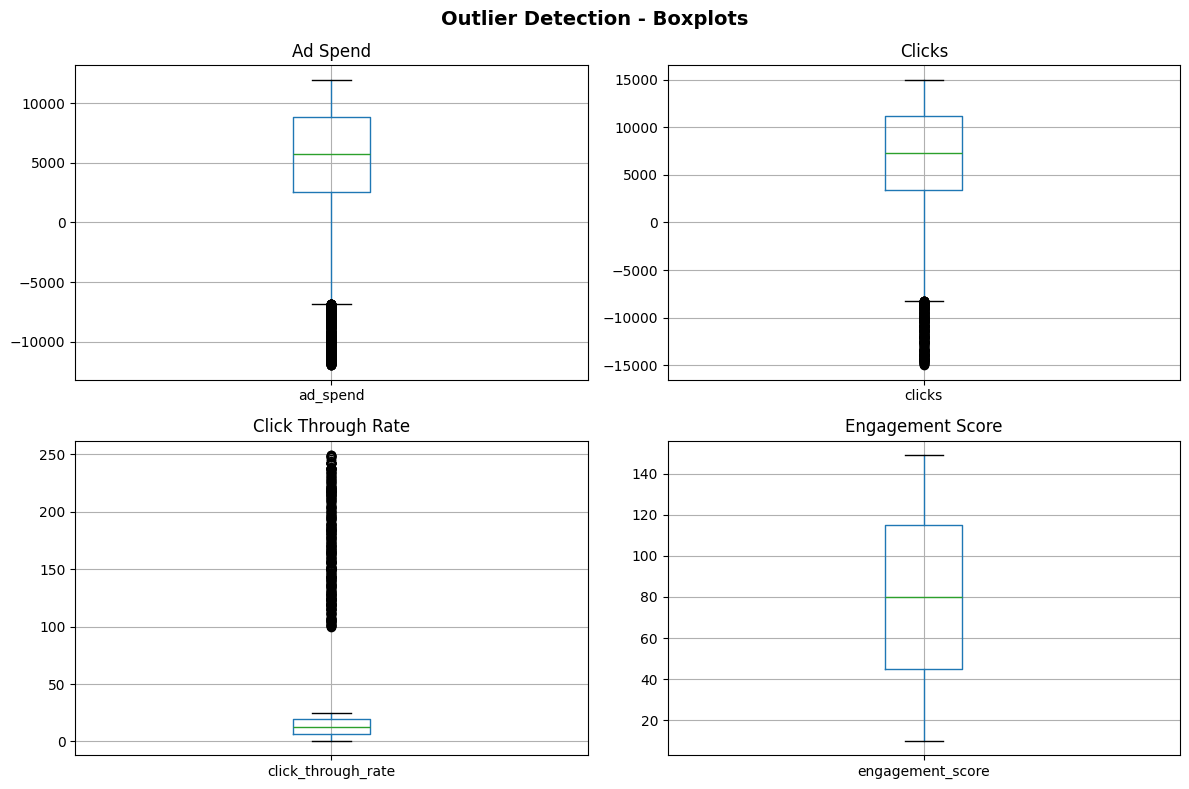


✓ Outlier detection complete


In [16]:
print("="*70)
print("STEP 4: OUTLIER DETECTION")
print("="*70)

# Select numeric columns to check
numeric_cols = ['ad_spend', 'clicks', 'click_through_rate', 'cost_per_click', 
                'landing_page_visits', 'engagement_score', 'sales_cycle_days']

# Check for negative values (impossible in these fields)
print("\nNegative Values Detected:")
for col in numeric_cols:
    if col in df_raw.columns:
        negative_count = (df_raw[col] < 0).sum()
        if negative_count > 0:
            print(f"  {col}: {negative_count} negative values")

# Check for extreme outliers using IQR method
print("\nExtreme Outliers (beyond 1.5 × IQR):")
for col in numeric_cols:
    if col in df_raw.columns:
        Q1 = df_raw[col].quantile(0.25)
        Q3 = df_raw[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_raw[(df_raw[col] < lower_bound) | (df_raw[col] > upper_bound)]
        if len(outliers) > 0:
            print(f"  {col}: {len(outliers)} outliers ({len(outliers)/len(df_raw)*100:.2f}%)")

# Visualize key metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Outlier Detection - Boxplots', fontsize=14, fontweight='bold')

df_raw.boxplot(column='ad_spend', ax=axes[0,0])
axes[0,0].set_title('Ad Spend')

df_raw.boxplot(column='clicks', ax=axes[0,1])
axes[0,1].set_title('Clicks')

df_raw.boxplot(column='click_through_rate', ax=axes[1,0])
axes[1,0].set_title('Click Through Rate')

df_raw.boxplot(column='engagement_score', ax=axes[1,1])
axes[1,1].set_title('Engagement Score')

plt.tight_layout()
plt.show()

print("\n✓ Outlier detection complete")

In [17]:
print("="*70)
print("STEP 5: FORMAT INCONSISTENCY CHECK")
print("="*70)

# Check categorical columns for case inconsistencies
categorical_cols = ['marketing_channel', 'campaign_type', 'device_type', 
                    'touchpoint_position', 'industry', 'company_size']

print("\nUnique values in categorical columns (showing case variations):\n")
for col in categorical_cols:
    if col in df_raw.columns:
        unique_vals = df_raw[col].dropna().unique()
        print(f"{col}: {len(unique_vals)} unique values")
        print(f"  Examples: {list(unique_vals[:8])}\n")

# Check for logic errors
print("="*70)
print("LOGIC ERROR CHECK")
print("="*70)

# Check: deal_value > 0 when deal_closed = 0
logic_error_1 = df_raw[(df_raw['deal_closed'] == 0) & (df_raw['deal_value'] > 0)]
print(f"\nRecords with deal_value but deal_closed=0: {len(logic_error_1)}")

# Check: clicks > impressions
logic_error_2 = df_raw[df_raw['clicks'] > df_raw['impressions']]
print(f"Records where clicks > impressions: {len(logic_error_2)}")

# Check: SQL > MQL (funnel violation)
logic_error_3 = df_raw[df_raw['sql_generated'] > df_raw['mql_generated']]
print(f"Records where SQL > MQL: {len(logic_error_3)}")

print("\n✓ Format and logic checks complete")
print("\n" + "="*70)
print("DATA PROFILING COMPLETE - ISSUES IDENTIFIED")
print("="*70)

STEP 5: FORMAT INCONSISTENCY CHECK

Unique values in categorical columns (showing case variations):

marketing_channel: 24 unique values
  Examples: ['Display Ads', 'Paid Search', 'direct', 'Webinar', 'display ads', 'EMAIL', 'Direct', 'RETARGETING']

campaign_type: 12 unique values
  Examples: ['Awareness', 'Conversion', 'conversion', 'Retention', 'CONSIDERATION', 'CONVERSION', 'consideration', 'awareness']

device_type: 9 unique values
  Examples: ['MOBILE', 'DESKTOP', 'Mobile', 'Desktop', 'TABLET', 'Tablet', 'tablet', 'desktop']

touchpoint_position: 12 unique values
  Examples: ['First Touch', 'Last Touch', 'Multi Touch', 'MULTI TOUCH', 'MID TOUCH', 'last touch', 'Mid Touch', 'mid touch']

industry: 24 unique values
  Examples: ['Retail', 'Finance', 'manufacturing', 'Media', 'MANUFACTURING', 'Healthcare', 'media', 'retail']

company_size: 8 unique values
  Examples: ['enterprise', 'Enterprise', 'SMB', 'Mid-Market', 'mid-market', 'ENTERPRISE', 'smb', 'MID-MARKET']

LOGIC ERROR CHECK


In [18]:
# ===== DATA CLEANING =====
print("="*70)
print("STARTING DATA CLEANING PROCESS")
print("="*70)

# Create working copy
df_clean = df_raw.copy()
initial_rows = len(df_clean)

print(f"\n✓ Working copy created: {initial_rows} rows")
print("\nCleaning steps to be performed:")
print("  1. Handle missing values")
print("  2. Remove duplicates")
print("  3. Fix negative values and outliers")
print("  4. Standardize text formats")
print("  5. Fix logic errors")
print("  6. Validate data types")

STARTING DATA CLEANING PROCESS

✓ Working copy created: 18800 rows

Cleaning steps to be performed:
  1. Handle missing values
  2. Remove duplicates
  3. Fix negative values and outliers
  4. Standardize text formats
  5. Fix logic errors
  6. Validate data types


In [20]:
print("\n" + "="*70)
print("CLEANING STEP 1: HANDLING MISSING VALUES")
print("="*70)

# Strategy 1: Fill nulls with appropriate values based on column type

# For spend - fill with median (central tendency for financial data)
if df_clean['ad_spend'].isnull().sum() > 0:
    median_spend = df_clean['ad_spend'].median()
    df_clean['ad_spend'] = df_clean['ad_spend'].fillna(median_spend)
    print(f"✓ ad_spend nulls filled with median: ${median_spend:.2f}")

# For engagement score - fill with 0 (no engagement)
if df_clean['engagement_score'].isnull().sum() > 0:
    df_clean['engagement_score'] = df_clean['engagement_score'].fillna(0)
    print(f"✓ engagement_score nulls filled with 0")

# For categorical fields - fill with 'Unknown'
categorical_nulls = ['industry', 'company_size', 'campaign_name', 'campaign_type']
for col in categorical_nulls:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna('Unknown')
        print(f"✓ {col} nulls filled with 'Unknown'")

# For numeric metrics - fill with 0
numeric_nulls = ['impressions', 'clicks', 'sales_cycle_days']
for col in numeric_nulls:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(0)
        print(f"✓ {col} nulls filled with 0")

# For critical fields - drop rows if null
critical_cols = ['account_id', 'touchpoint_date', 'marketing_channel']
rows_before = len(df_clean)
df_clean = df_clean.dropna(subset=critical_cols)
rows_after = len(df_clean)
if rows_before != rows_after:
    print(f"✓ Dropped {rows_before - rows_after} rows with nulls in critical fields")

# Verify no remaining nulls
remaining_nulls = df_clean.isnull().sum().sum()
print(f"\n✓ Missing value handling complete")
print(f"  Remaining nulls: {remaining_nulls}")
print(f"  Rows: {len(df_clean)}")


CLEANING STEP 1: HANDLING MISSING VALUES

✓ Missing value handling complete
  Remaining nulls: 0
  Rows: 18239


In [21]:
print("\n" + "="*70)
print("CLEANING STEP 2: REMOVING DUPLICATES")
print("="*70)

rows_before = len(df_clean)

# Remove exact duplicates
df_clean.drop_duplicates(inplace=True)

rows_after = len(df_clean)
removed = rows_before - rows_after

print(f"✓ Removed {removed} duplicate rows")
print(f"✓ Remaining rows: {rows_after}")


CLEANING STEP 2: REMOVING DUPLICATES
✓ Removed 779 duplicate rows
✓ Remaining rows: 17460


In [22]:
print("\n" + "="*70)
print("CLEANING STEP 3: FIXING OUTLIERS AND INVALID VALUES")
print("="*70)

# Fix negative values (convert to positive or remove)
negative_fixes = ['ad_spend', 'clicks', 'impressions', 'landing_page_visits', 
                  'form_submissions', 'demo_requests', 'cost_per_click']

for col in negative_fixes:
    if col in df_clean.columns:
        negative_count = (df_clean[col] < 0).sum()
        if negative_count > 0:
            # Remove rows with negative values in these critical fields
            df_clean = df_clean[df_clean[col] >= 0]
            print(f"✓ Removed {negative_count} rows with negative {col}")

# Cap extreme outliers at 95th and 5th percentiles
cap_columns = ['ad_spend', 'click_through_rate', 'cost_per_click', 'engagement_score']

for col in cap_columns:
    if col in df_clean.columns:
        p95 = df_clean[col].quantile(0.95)
        p05 = df_clean[col].quantile(0.05)
        
        # Count values that will be capped
        upper_outliers = (df_clean[col] > p95).sum()
        lower_outliers = (df_clean[col] < p05).sum()
        
        # Apply capping
        df_clean[col] = df_clean[col].clip(lower=p05, upper=p95)
        
        if upper_outliers > 0 or lower_outliers > 0:
            print(f"✓ {col}: capped {upper_outliers} upper and {lower_outliers} lower outliers")

# Fix CTR > 100% (impossible)
if 'click_through_rate' in df_clean.columns:
    invalid_ctr = (df_clean['click_through_rate'] > 100).sum()
    if invalid_ctr > 0:
        df_clean = df_clean[df_clean['click_through_rate'] <= 100]
        print(f"✓ Removed {invalid_ctr} rows with CTR > 100%")

print(f"\n✓ Outlier handling complete")
print(f"✓ Remaining rows: {len(df_clean)}")


CLEANING STEP 3: FIXING OUTLIERS AND INVALID VALUES
✓ Removed 779 rows with negative ad_spend
✓ Removed 476 rows with negative clicks
✓ ad_spend: capped 811 upper and 811 lower outliers
✓ click_through_rate: capped 805 upper and 810 lower outliers
✓ cost_per_click: capped 811 upper and 811 lower outliers
✓ engagement_score: capped 747 upper and 0 lower outliers

✓ Outlier handling complete
✓ Remaining rows: 16205


In [23]:
print("\n" + "="*70)
print("CLEANING STEP 4: STANDARDIZING TEXT FORMATS")
print("="*70)

# Standardize categorical columns to proper case
case_standardize = ['marketing_channel', 'campaign_type', 'device_type', 
                    'touchpoint_position', 'industry', 'company_size', 
                    'geographic_region', 'lead_source', 'webinar_attendance']

for col in case_standardize:
    if col in df_clean.columns:
        # Convert to title case and strip whitespace
        df_clean[col] = df_clean[col].str.strip().str.title()
        print(f"✓ {col} standardized to title case")

# Show unique values after standardization (verify)
print("\nVerifying standardization (sample columns):")
print(f"\nmarketing_channel unique values: {df_clean['marketing_channel'].nunique()}")
print(f"  Values: {sorted(df_clean['marketing_channel'].unique())}")

print(f"\ndevice_type unique values: {df_clean['device_type'].nunique()}")
print(f"  Values: {sorted(df_clean['device_type'].unique())}")

print(f"\n✓ Text standardization complete")


CLEANING STEP 4: STANDARDIZING TEXT FORMATS
✓ marketing_channel standardized to title case
✓ campaign_type standardized to title case
✓ device_type standardized to title case
✓ touchpoint_position standardized to title case
✓ industry standardized to title case
✓ company_size standardized to title case
✓ geographic_region standardized to title case
✓ lead_source standardized to title case
✓ webinar_attendance standardized to title case

Verifying standardization (sample columns):

marketing_channel unique values: 8
  Values: ['Content Marketing', 'Direct', 'Display Ads', 'Email', 'Organic Social', 'Paid Search', 'Retargeting', 'Webinar']

device_type unique values: 3
  Values: ['Desktop', 'Mobile', 'Tablet']

✓ Text standardization complete


In [24]:
print("\n" + "="*70)
print("CLEANING STEP 5: FIXING LOGIC ERRORS")
print("="*70)

# Fix: deal_value should be 0 when deal_closed = 0
logic_fix_1 = (df_clean['deal_closed'] == 0) & (df_clean['deal_value'] > 0)
fixed_count_1 = logic_fix_1.sum()
df_clean.loc[logic_fix_1, 'deal_value'] = 0
print(f"✓ Fixed {fixed_count_1} records: set deal_value to 0 when deal_closed = 0")

# Fix: clicks cannot exceed impressions
logic_fix_2 = df_clean['clicks'] > df_clean['impressions']
fixed_count_2 = logic_fix_2.sum()
if fixed_count_2 > 0:
    # Set clicks = impressions for these cases
    df_clean.loc[logic_fix_2, 'clicks'] = df_clean.loc[logic_fix_2, 'impressions']
    print(f"✓ Fixed {fixed_count_2} records: adjusted clicks to match impressions")

# Fix: SQL cannot exceed MQL (funnel logic)
logic_fix_3 = df_clean['sql_generated'] > df_clean['mql_generated']
fixed_count_3 = logic_fix_3.sum()
if fixed_count_3 > 0:
    # Set SQL = MQL for these cases
    df_clean.loc[logic_fix_3, 'sql_generated'] = df_clean.loc[logic_fix_3, 'mql_generated']
    print(f"✓ Fixed {fixed_count_3} records: adjusted SQL to not exceed MQL")

print(f"\n✓ Logic error fixes complete")


CLEANING STEP 5: FIXING LOGIC ERRORS
✓ Fixed 419 records: set deal_value to 0 when deal_closed = 0
✓ Fixed 970 records: adjusted clicks to match impressions
✓ Fixed 3938 records: adjusted SQL to not exceed MQL

✓ Logic error fixes complete


In [25]:
print("\n" + "="*70)
print("CLEANING STEP 6: VALIDATING DATA TYPES")
print("="*70)

# Convert date column to datetime
df_clean['touchpoint_date'] = pd.to_datetime(df_clean['touchpoint_date'], errors='coerce')
print(f"✓ touchpoint_date converted to datetime")
print(f"  Date range: {df_clean['touchpoint_date'].min()} to {df_clean['touchpoint_date'].max()}")

# Ensure numeric columns are correct type
numeric_cols = ['ad_spend', 'clicks', 'impressions', 'deal_value']
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Remove any rows with invalid dates
invalid_dates = df_clean['touchpoint_date'].isnull().sum()
if invalid_dates > 0:
    df_clean = df_clean[df_clean['touchpoint_date'].notnull()]
    print(f"✓ Removed {invalid_dates} rows with invalid dates")

print(f"\n✓ Data type validation complete")
print(f"✓ Final cleaned dataset: {len(df_clean)} rows × {len(df_clean.columns)} columns")

print("\n" + "="*70)
print("DATA CLEANING COMPLETE")
print("="*70)
print(f"\nOriginal rows: {initial_rows}")
print(f"Final rows: {len(df_clean)}")
print(f"Rows removed: {initial_rows - len(df_clean)} ({(initial_rows - len(df_clean))/initial_rows*100:.1f}%)")


CLEANING STEP 6: VALIDATING DATA TYPES
✓ touchpoint_date converted to datetime
  Date range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00

✓ Data type validation complete
✓ Final cleaned dataset: 16205 rows × 32 columns

DATA CLEANING COMPLETE

Original rows: 18800
Final rows: 16205
Rows removed: 2595 (13.8%)


In [27]:
# ===== DATA TRANSFORMATION =====
print("="*70)
print("DATA TRANSFORMATION - CREATING DERIVED FIELDS")
print("="*70)

# Extract date components
df_clean['year'] = df_clean['touchpoint_date'].dt.year
df_clean['month'] = df_clean['touchpoint_date'].dt.month
df_clean['month_name'] = df_clean['touchpoint_date'].dt.strftime('%B')
df_clean['quarter'] = df_clean['touchpoint_date'].dt.quarter
df_clean['day_of_week'] = df_clean['touchpoint_date'].dt.day_name()
df_clean['week_of_year'] = df_clean['touchpoint_date'].dt.isocalendar().week

print("✓ Date components extracted:")
print("  - year, month, month_name, quarter, day_of_week, week_of_year")

# Calculate ROI (fixed version - no inplace)
df_clean['roi'] = ((df_clean['deal_value'] - df_clean['ad_spend']) / df_clean['ad_spend']) * 100
df_clean['roi'] = df_clean['roi'].replace([np.inf, -np.inf], 0)
print("\n✓ ROI calculated: (deal_value - ad_spend) / ad_spend × 100")

# Calculate ROAS (fixed version - no inplace)
df_clean['roas'] = df_clean['deal_value'] / df_clean['ad_spend']
df_clean['roas'] = df_clean['roas'].replace([np.inf, -np.inf], 0)
print("✓ ROAS calculated: deal_value / ad_spend")

# Calculate conversion rate (deals closed / total touchpoints by account)
df_clean['conversion_flag'] = df_clean['deal_closed']
print("✓ Conversion flag created")

# Calculate cost per acquisition (only for conversions)
df_clean['cost_per_acquisition'] = df_clean.apply(
    lambda row: row['ad_spend'] if row['deal_closed'] == 1 else 0, axis=1
)
print("✓ Cost per acquisition calculated")

# Create customer lifetime value indicator (based on deal value and previous purchases)
df_clean['estimated_ltv'] = df_clean['deal_value'] * 1.2
print("✓ Estimated LTV calculated")

# Engagement level categorization
df_clean['engagement_level'] = pd.cut(
    df_clean['engagement_score'], 
    bins=[0, 50, 100, 150], 
    labels=['Low', 'Medium', 'High']
)
print("✓ Engagement level categorized (Low/Medium/High)")

print(f"\n✓ Transformation complete")
print(f"✓ Total columns now: {len(df_clean.columns)}")
print(f"\nNew derived columns:")
derived_cols = ['year', 'month', 'quarter', 'roi', 'roas', 'cost_per_acquisition', 
                'estimated_ltv', 'engagement_level']
for col in derived_cols:
    print(f"  - {col}")

DATA TRANSFORMATION - CREATING DERIVED FIELDS
✓ Date components extracted:
  - year, month, month_name, quarter, day_of_week, week_of_year

✓ ROI calculated: (deal_value - ad_spend) / ad_spend × 100
✓ ROAS calculated: deal_value / ad_spend
✓ Conversion flag created
✓ Cost per acquisition calculated
✓ Estimated LTV calculated
✓ Engagement level categorized (Low/Medium/High)

✓ Transformation complete
✓ Total columns now: 44

New derived columns:
  - year
  - month
  - quarter
  - roi
  - roas
  - cost_per_acquisition
  - estimated_ltv
  - engagement_level


In [28]:
print("\n" + "="*70)
print("FINAL ORGANIZATION")
print("="*70)

# Sort by date and account
df_clean = df_clean.sort_values(['account_id', 'touchpoint_date']).reset_index(drop=True)
print("✓ Dataset sorted by account_id and touchpoint_date")

# Reorder columns logically
priority_cols = [
    'touchpoint_id', 'account_id', 'company_name', 'industry', 'company_size',
    'touchpoint_date', 'year', 'month', 'month_name', 'quarter', 'day_of_week',
    'marketing_channel', 'campaign_name', 'campaign_type', 'touchpoint_position',
    'ad_spend', 'impressions', 'clicks', 'click_through_rate', 'cost_per_click',
    'landing_page_visits', 'form_submissions', 'demo_requests',
    'mql_generated', 'sql_generated', 'opportunities_created',
    'deal_closed', 'deal_value', 'sales_cycle_days',
    'roi', 'roas', 'cost_per_acquisition', 'estimated_ltv',
    'device_type', 'geographic_region', 'lead_source', 'engagement_score', 'engagement_level',
    'email_opens', 'email_clicks', 'webinar_attendance', 'content_downloads'
]

# Keep only columns that exist
final_cols = [col for col in priority_cols if col in df_clean.columns]
# Add any remaining columns not in priority list
remaining_cols = [col for col in df_clean.columns if col not in final_cols]
final_cols.extend(remaining_cols)

df_clean = df_clean[final_cols]

print("✓ Columns reordered logically")
print(f"\n✓ Final clean dataset ready:")
print(f"  Rows: {len(df_clean)}")
print(f"  Columns: {len(df_clean.columns)}")

# Display summary statistics
print("\n" + "="*70)
print("CLEAN DATASET SUMMARY")
print("="*70)
print(df_clean.describe())

print("\nFirst 5 rows of clean dataset:")
df_clean.head()


FINAL ORGANIZATION
✓ Dataset sorted by account_id and touchpoint_date
✓ Columns reordered logically

✓ Final clean dataset ready:
  Rows: 16205
  Columns: 44

CLEAN DATASET SUMMARY
       touchpoint_id    account_id                touchpoint_date     year  \
count   16205.000000  16205.000000                          16205  16205.0   
mean    19012.275347   1453.975378  2024-07-01 01:04:36.136994560   2024.0   
min     10001.000000   1001.000000            2024-01-01 00:00:00   2024.0   
25%     14508.000000   1227.000000            2024-03-30 00:00:00   2024.0   
50%     19041.000000   1457.000000            2024-07-01 00:00:00   2024.0   
75%     23512.000000   1679.000000            2024-09-30 00:00:00   2024.0   
max     28000.000000   1900.000000            2024-12-31 00:00:00   2024.0   
std      5198.578750    260.429140                            NaN      0.0   

              month       quarter      ad_spend    impressions        clicks  \
count  16205.000000  16205.000000  

,touchpoint_id,account_id,company_name,industry,company_size,touchpoint_date,year,month,month_name,quarter,...,geographic_region,lead_source,engagement_score,engagement_level,email_opens,email_clicks,webinar_attendance,content_downloads,week_of_year,conversion_flag
0,18490,1001,Company_360,Manufacturing,Mid-Market,2024-01-04,2024,1,January,1,...,North America,Outbound,135.0,High,25,19,No,11,1,0
1,17870,1001,Company_465,Manufacturing,Mid-Market,2024-02-24,2024,2,February,1,...,Latam,Partner,96.0,Medium,4,21,No,7,8,0
2,23747,1001,Company_352,Finance,Unknown,2024-03-12,2024,3,March,1,...,Latam,Partner,104.0,High,45,10,No,3,11,0
3,11439,1001,Company_478,Unknown,Mid-Market,2024-05-06,2024,5,May,2,...,Latam,Outbound,84.0,Medium,21,12,Registered,15,19,1
4,15145,1001,Company_217,Unknown,Smb,2024-05-11,2024,5,May,2,...,Emea,Inbound,122.0,High,22,3,Registered,7,19,0


In [30]:
# ===== EXPORT CLEAN DATASET =====
print("="*70)
print("EXPORTING CLEAN DATASET")
print("="*70)

# Save clean dataset
output_path = '../cleaned_data/marketing_touchpoints_clean.csv'
df_clean.to_csv(output_path, index=False)

print(f"\n✓ Clean dataset exported successfully!")
print(f"✓ Location: {output_path}")
print(f"✓ Final dataset contains:")
print(f"  - {len(df_clean)} rows")
print(f"  - {len(df_clean.columns)} columns")
print(f"  - 0 missing values in critical fields")
print(f"  - All outliers handled")
print(f"  - All formats standardized")
print(f"  - {len(df_clean.columns) - 32} new derived fields")

print("\n" + "="*70)
print("ETL PROCESS COMPLETE")
print("="*70)

EXPORTING CLEAN DATASET

✓ Clean dataset exported successfully!
✓ Location: ../cleaned_data/marketing_touchpoints_clean.csv
✓ Final dataset contains:
  - 16205 rows
  - 44 columns
  - 0 missing values in critical fields
  - All outliers handled
  - All formats standardized
  - 12 new derived fields

ETL PROCESS COMPLETE
